In [13]:
import pygmt
import pandas as pd
import h5py
import numpy as np

In [9]:
with h5py.File('OUTPUT_FILES/initial_model.h5', 'r') as f:
    initial_vs = f['vs'][:].T
    x = f['x'][:]
    y = f['y'][:]
with h5py.File('OUTPUT_FILES/final_model.h5', 'r') as f:
    final_vs = f['vs'][:].T
dv = (final_vs - initial_vs) / initial_vs * 100

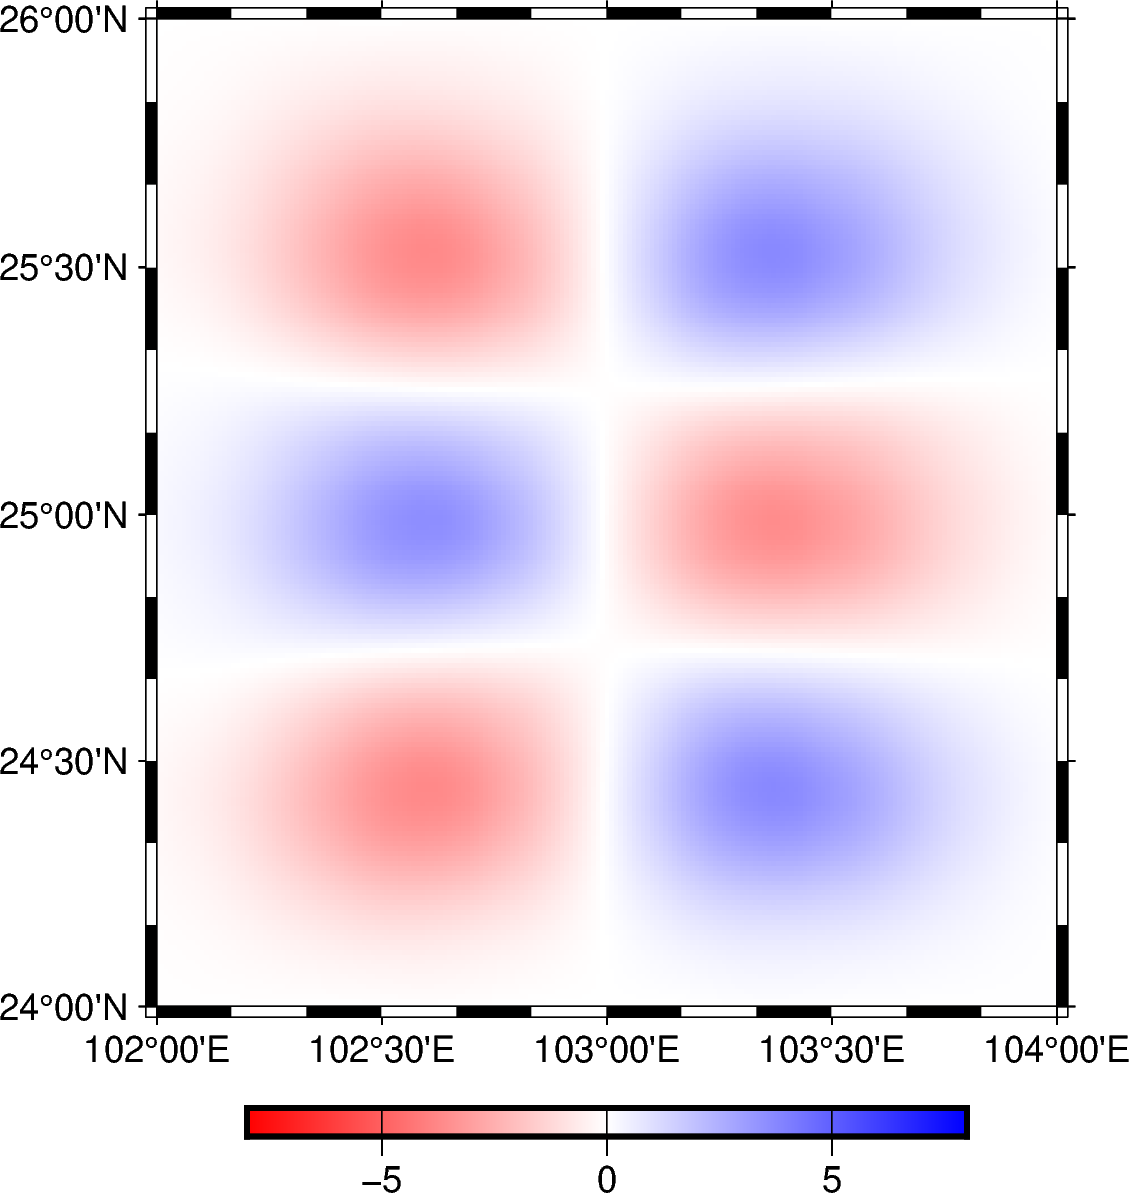

In [16]:
idep = 15
region = [102, 104, 24,26]
xx, yy = np.meshgrid(x, y, indexing='ij')
grid = pygmt.surface(x=xx.ravel(), y=yy.ravel(), z=dv[:, :, idep].ravel(), region=region, spacing='0.01/0.01')
fig = pygmt.Figure()
pygmt.makecpt(cmap='polar', series=[-8, 8, 0.1], continuous=True, reverse=True)
fig.grdimage(
    grid,
    cmap=True,
    region=region,
    projection='M3i',
    frame='af'
)
fig.colorbar(frame='ag')
fig.show()